# 피마 인디언 당뇨병 데이터

- 데이터 활용 목적 : 당뇨병 여부를 판단하는 머신러닝 예측 모델을 개발 
- 데이터 개요
    - 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터 
    - 일반적으로 알려진 당뇨병의 원인은 식습관과 유전 
        - 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속됨 
        - 20세기 후반 서구화된 식습관으로 많은 당뇨 환자가 발생 
        
    - 피처
        - Pregnancies : 임신 횟수
        - Glucose : 포도당 부하 검사 수치
        - BloodPressure : 혈압(mm Hg)
        - SkinTickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
        - Insulin : 혈청 인슐린(mm U/ml)
        - BMI : 체질량 지수(체중(kg) / 키(m))^2
        - DiabetesPedigreeFunction : 당뇨 내력 가중치 값
        - Age : 나이
        - Outcome : 클래스 결정 값(0 또는 1)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 머신러닝 import
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

# 평가지표 import
from sklearn.metrics import roc_auc_score, roc_curve
#통계모델 import
import statsmodels.api as sm



In [70]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [71]:
df = pd.read_csv('./data/diabetes.csv')

In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.shape

(768, 9)

In [74]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

- 모두 숫자형 데이터로 이루어져 있므로 독립변수 인코딩은 필요하지 않은 것 같음

In [75]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 결측치 없음

In [77]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 상식적으로 BMI와 Glucose 들은 diabetes 와 관련이 높은 편에도 불구함에도 독립변수들의 수치가 0 들이 나옴
- 이상치들 처리를 해야 함

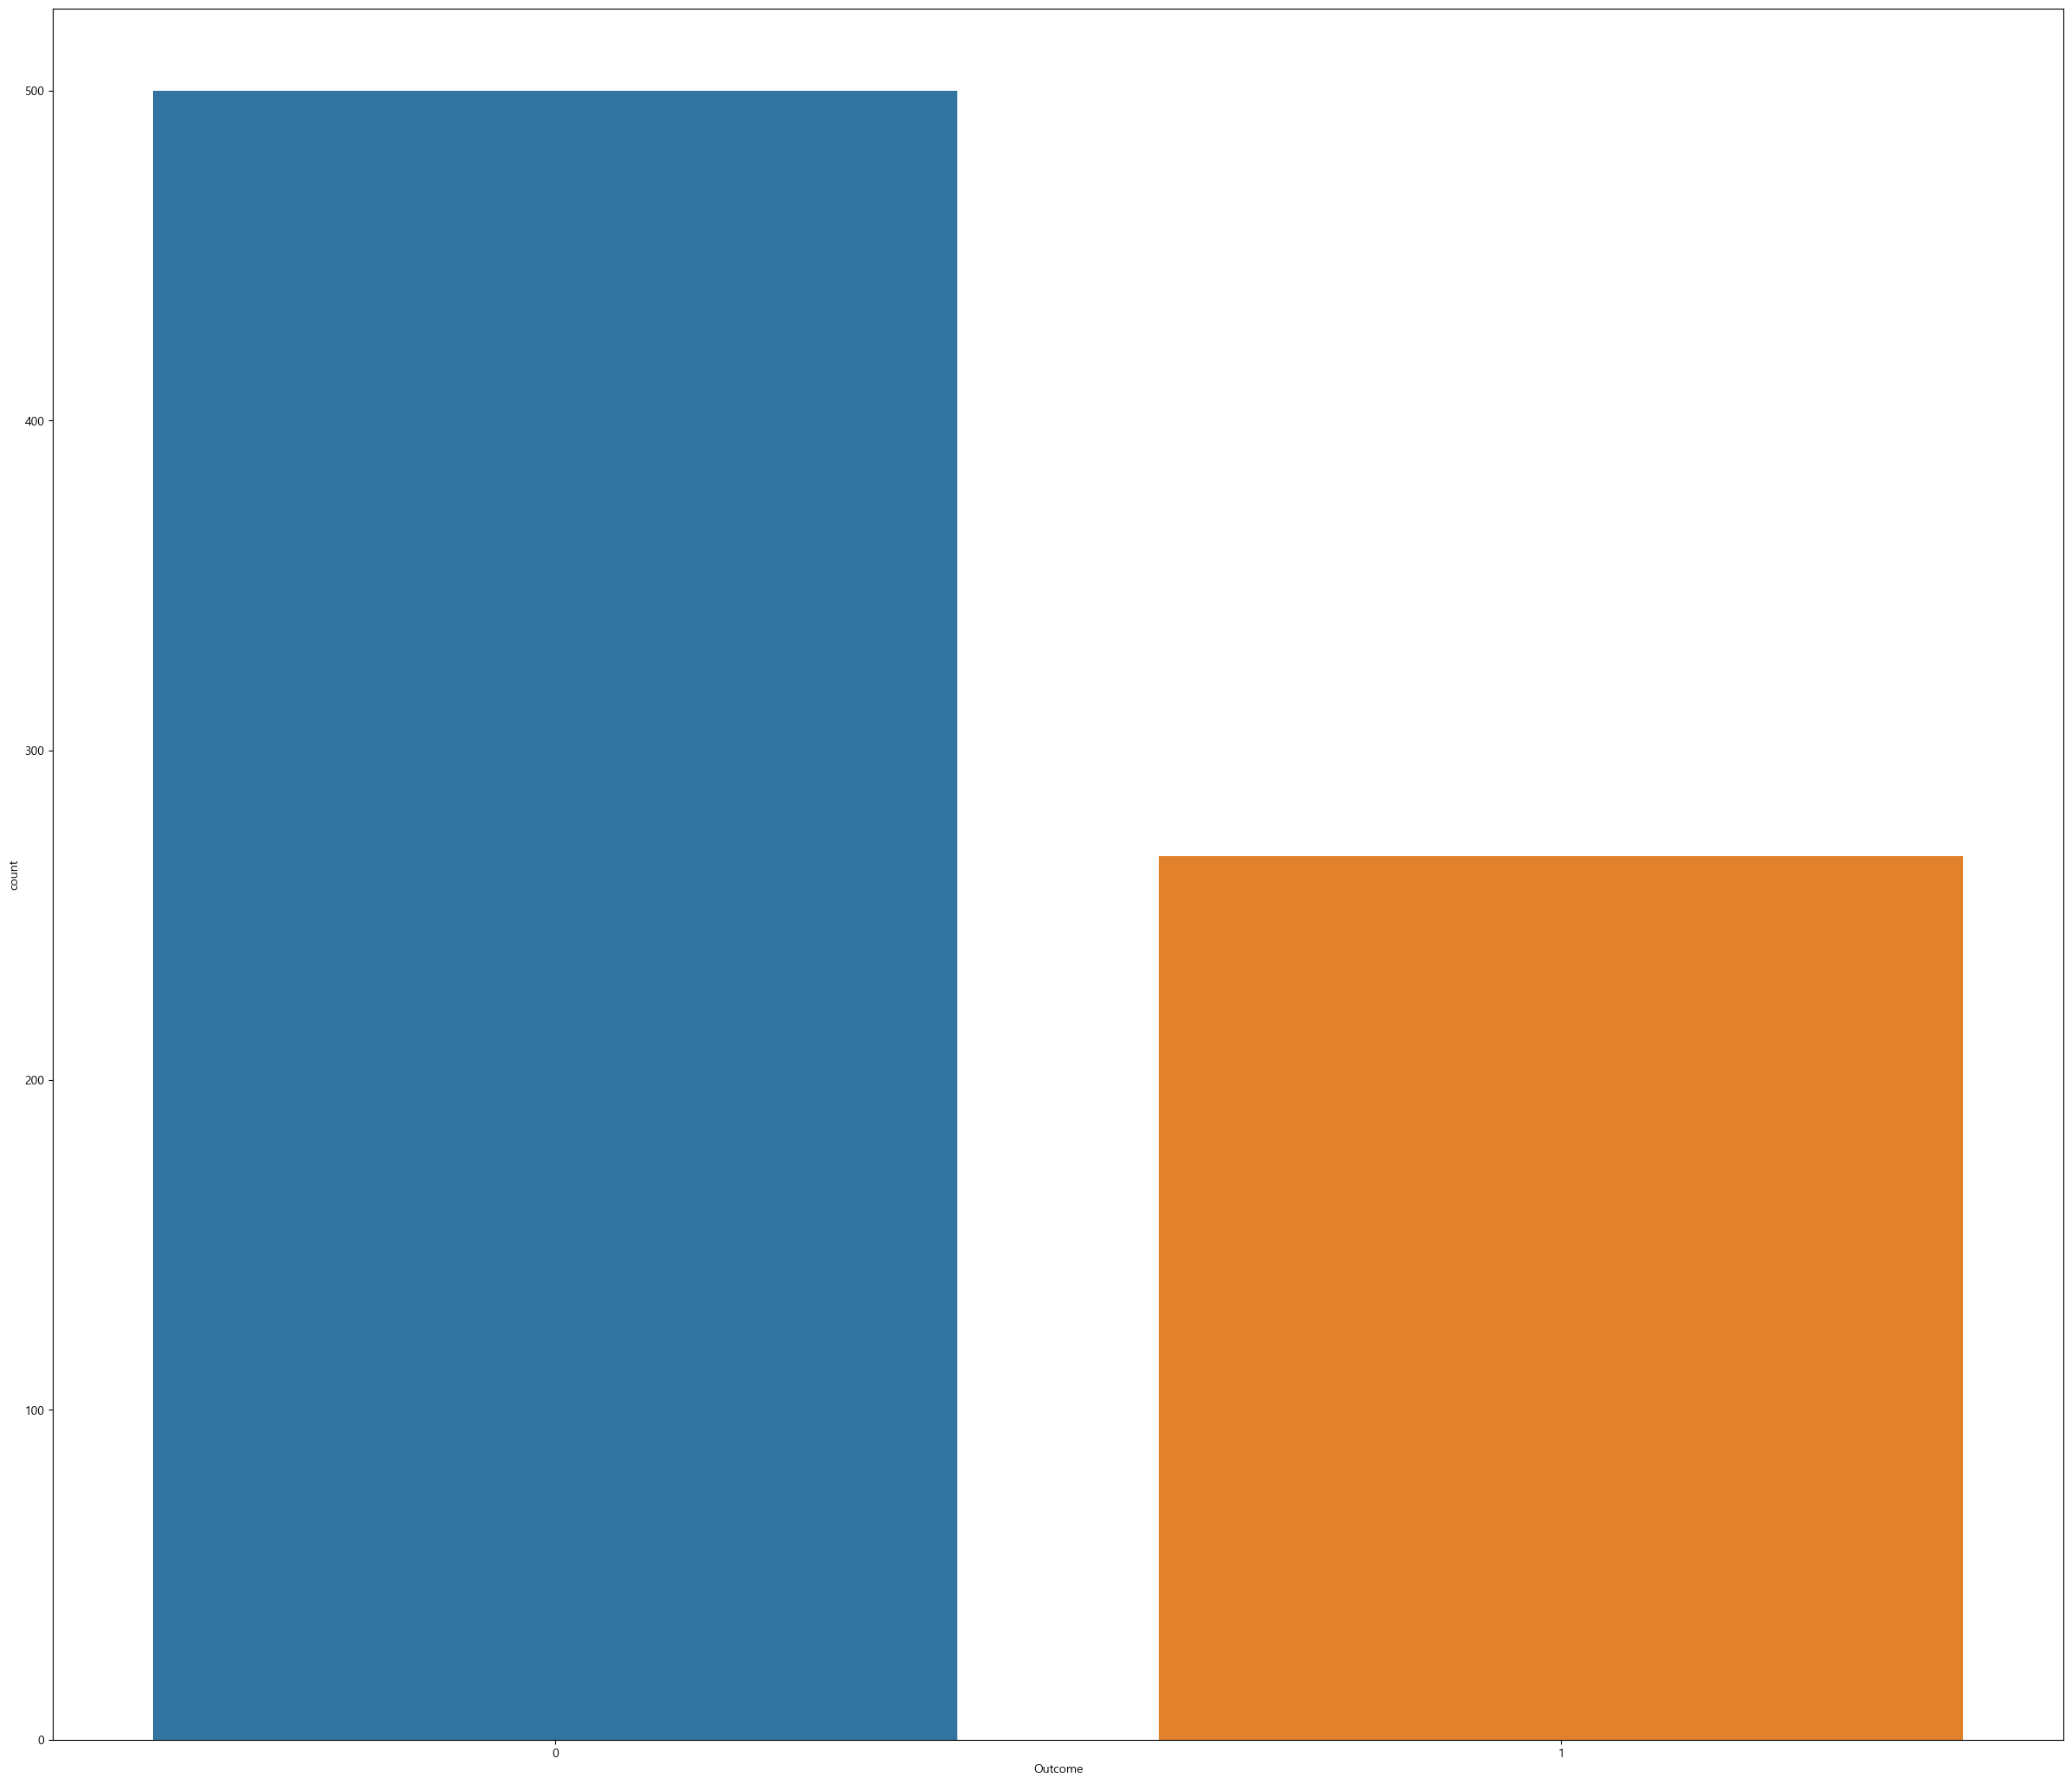

In [79]:
# 종속변수 클래스 분포 시각화 
sns.countplot(x = "Outcome", data = df)
plt.show()

In [80]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

- 전체 데이터 개수인 768개 중에 1이 약 40% 정도를 차지하고 있음을 알 수 있다.

In [81]:
len(df.columns)

9

In [82]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [83]:
df['Glucose'].value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

In [84]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [85]:
df['SkinThickness'].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64

In [86]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


- 상관관계도 역시 수치가 정확해 보이지 않음

In [87]:
# 피처 각각에 대한 히스토그램을 출력
def plot_hist(df):
    plt.rcParams['figure.figsize'] = [30, 26]
    fig = plt.figure(1) 
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(9, 9, i + 1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
        
    plt.tight_layout()
    plt.show()

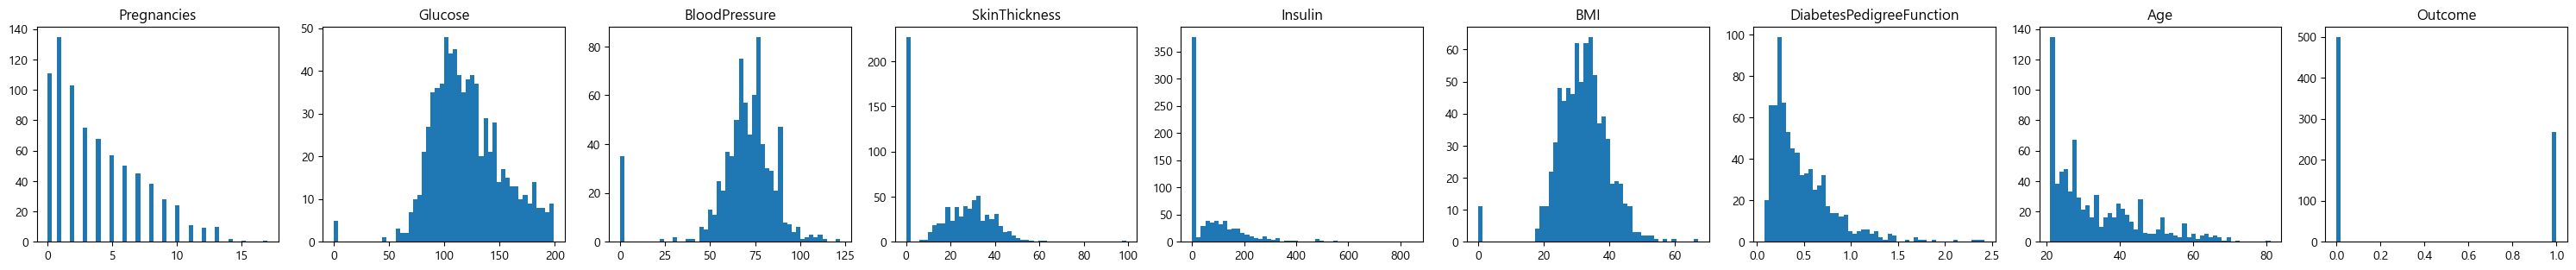

In [88]:
plot_hist(df)

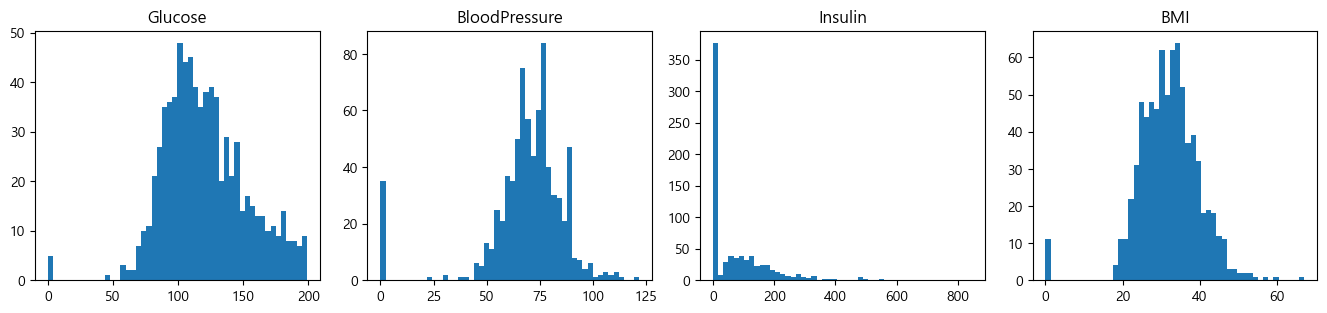

In [89]:
plot_hist(df[['Glucose', 'BloodPressure', 'Insulin', 'BMI']])

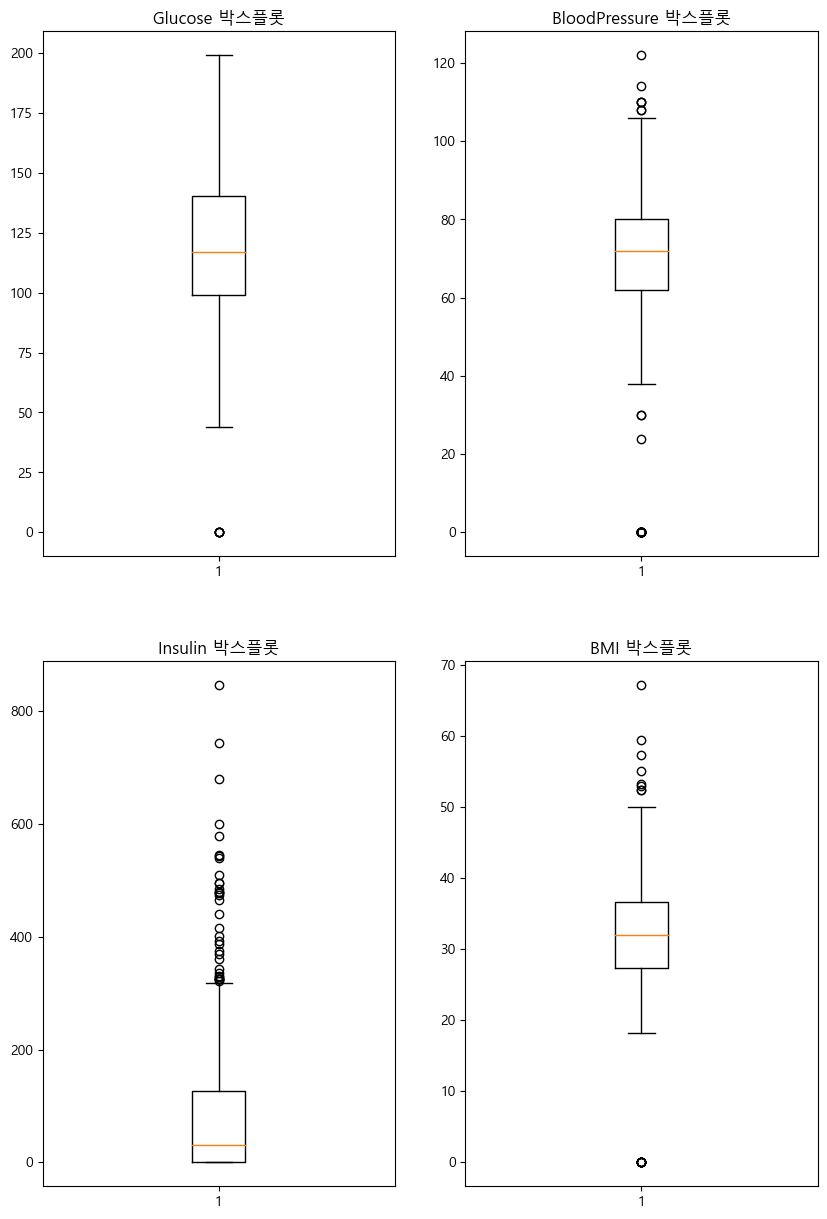

In [90]:
# 그래프 객체 생성
fig = plt.figure(figsize = (10, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x = [df['Glucose']])
ax2.boxplot(x = [df['BloodPressure']])
ax3.boxplot(x = [df['Insulin']])
ax4.boxplot(x = [df['BMI']])

ax1.set_title('Glucose 박스플롯')
ax2.set_title('BloodPressure 박스플롯')
ax3.set_title('Insulin 박스플롯')
ax4.set_title('BMI 박스플롯')

plt.show()

- 결과가 이상한 박스플롯이 나오므로 전처리를 먼저 한후에 박스플롯을 다시 해야 할 것 같음.

### 머신러닝용 데이터 전처리

In [91]:
# 이상치들이 굉장히 많다 
print('Glucose:',len(df[df['Glucose']==0]))
print('BloodPressure:',len(df[df['BloodPressure']==0]))
print('SkinThickness:',len(df[df['SkinThickness']==0]))
print('Insulin:',len(df[df['Insulin']==0]))
print('BMI:',len(df[df['BMI']==0]))

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [93]:
# 또한 마찬가지
print('Glucose:',len(df[df['Glucose']==0]))
print('BloodPressure:',len(df[df['BloodPressure']==0]))
print('SkinThickness:',len(df[df['SkinThickness']==0]))
print('Insulin:',len(df[df['Insulin']==0]))
print('BMI:',len(df[df['BMI']==0]))

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


- 위의 결과를 보면 최소값이 0으로 되어 있는 데이터들이 너무 많음.
- Glocose, BloodPressure, SkinThickness, Insulin, BMI 같이 당뇨에 연관되어있는 것들이 실제로 0일 수는 없으므로 전처리 다시 할게여~

In [94]:
nf = df.copy()
nf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
cols = [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
nf[cols] = nf[cols].replace(0, np.nan)

# 위 5개 feature 에 대해 0값을 평균 값으로 대체
mean_col = nf[cols].mean()
nf[cols] = nf[cols].replace(np.nan, mean_col)

- 로지스틱은 숫자데이터에 스케일링을 적용하면 성능이 더 좋아지는 경우가 많으므로 StandardScaler를 적용할것임

In [96]:
nf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 로지스틱 회귀를 이용한 예측모델 생성

In [137]:
# 평가지표 출력하는 함수 설정
def answer(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [163]:
#  Plot 그리기
def pre_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], label='정밀도')
    plt.plot(thresholds, recalls[:thresholds_boundary],  label='재현율')

    
    plt.xlim()
    plt.xlabel('기준값')
    plt.ylabel('정밀도 & 재현율')
    plt.legend()
    plt.grid()

In [164]:
# 피쳐 데이터 세트 X, 레이블 데이터 세트 y 를 추출
x = nf.drop('Outcome', axis = 1)
y = nf['Outcome']

In [165]:
# 데이터를 훈련과 테스트 데이터 셋으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156, stratify=y)

In [166]:
# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
answer(y_test, pred)

오차행렬:
 [[89 11]
 [26 28]]

정확도: 0.7597
정밀도: 0.7179
재현율: 0.5185
F1: 0.6022
AUC: 0.7043


C:\Users\ITSC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


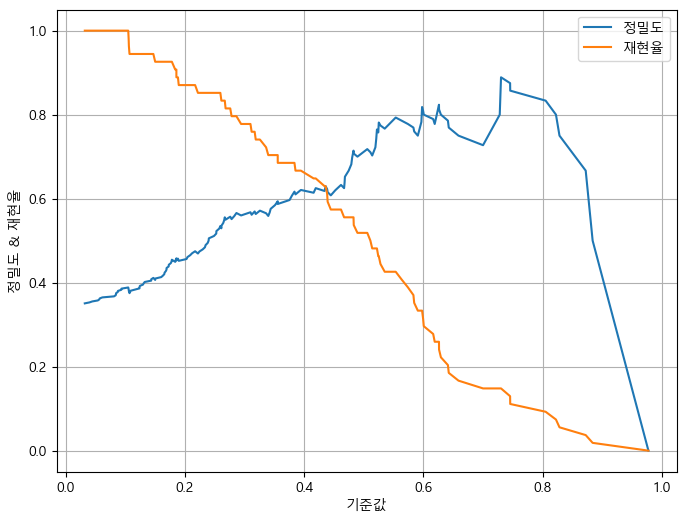

In [167]:
# 기준값별로 정밀도-재현율 출력
pred_proba = lr.predict_proba(x_test)[:, 1]
pre_plot(y_test, pred_proba)

In [168]:
x = nf.drop('Outcome', axis = 1)
y = nf['Outcome']

In [169]:
# 데이터 스케일링 적용
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=156, stratify = y)

In [171]:
# 로지스틱 회귀로 학습, 예측, 평가 수행
lr = LogisticRegression()
lr.fit(x_train,  y_train)

LogisticRegression()

In [172]:
pred = lr.predict(x_test)
answer(y_test, pred)

오차행렬:
 [[89 11]
 [21 33]]

정확도: 0.7922
정밀도: 0.7500
재현율: 0.6111
F1: 0.6735
AUC: 0.7506


- 기준값(threshold)의 이해

분류 모델의 y값은 기본적으로 확률 값으로 출력됨. 이를 분류 결과로 변환해 주기 위해서는 0과 1 사이의 일정한 값(threshold)을 기준으로 이보다 크면 참, 작으면 거짓으로 취급해 주어야 함.